### Catalyst Beginner Tutorial
Every catalyst algorithm consists of at least two functions you have to define:
几个重要的地方：（market place）https://enigma.co/marketplace/index.html， （交易所交易对对照表）https://enigma.co/catalyst/status/#Poloniex， （说明文档）https://enigma.co/catalyst/example-algos.html，(函数API）https://enigma.co/catalyst/appendix.html。

- initialize(context)
- handle_data(context, data)

注意：data containing the current trading bar with open, high, low, and close (OHLC) prices as well as volume for each crypto asset in your universe

### Backtesting（回测阶段）
#### 1、Ingesting data
Before you can backtest your algorithm, you first need to load the historical pricing data that Catalyst needs to run your simulation through a process called ingestion. When you ingest data, Catalyst downloads that data in compressed form from the Enigma servers (which eventually will migrate to the Enigma Data Marketplace), and stores it locally to make it available at runtime.

When running in live trading mode, Catalyst will first look for historical pricing data in the locally stored bundles. If there is anything missing, Catalyst will hit the exchange for the most recent data, and merge it with the local bundle to optimize the number of requests it needs to make to the exchange.

注意：下载数据时需要翻墙，目前只支持：bitfinex', 'bittrex', 'poloniex', 'binance'
```
#命令行运行：从bitfinex交易所下载btc_usd交易对, 默认下载的是日线数据
catalyst ingest-exchange -x bitfinex -i btc_usd #日线
catalyst ingest-exchange -x bitfinex -i btc_usd -f minute #分钟
catalyst ingest-exchange --help #其他参数帮助
```

#### 2、Running the algorithm
三种方式运算策略

##### 2.1 A command-line interface
```
##策略：buy_btc_simple.py
    from catalyst.api import order, record, symbol

    def initialize(context):
        context.asset = symbol('btc_usd')

    def handle_data(context, data):
        order(context.asset, 1)
        record(btc = data.current(context.asset, 'price'))
    
示例：catalyst run -f buy_btc_simple.py -x bitfinex --start 2016-1-1 --end 2017-9-30 -c usd --capital-base 100000 -o buy_btc_simple_out.pickle
```

命令行运行：**catalyst --help**，输出如下信息

```
Usage: catalyst [OPTIONS] COMMAND [ARGS]...
  Top level catalyst entry point.
Options:
  --version               Show the version and exit.
  --help                  Show this message and exit.

Commands:
  ingest-exchange       Ingest data for the given exchange.
  live（实盘）         Trade live with the given algorithm.
  run（回测）          Run a backtest for the given algorithm.
```

命令行运行：**catalyst <font color='red'>run</font> --help**，输出信息

As you can see there are a couple of flags that specify where to find your algorithm **(-f)** as well as a the **-x** flag to specify which exchange to use. There are also arguments for the date range to run the algorithm over **(--start and --end)**. You also need to set the quote currency for your algorithm through the **-c** flag, and the **--capital_base**. All the aforementioned parameters **are required**. 

**Optionally**, you will want to save the performance metrics of your algorithm so that you can analyze how it performed. This is done via the --output flag and will cause it to write the performance DataFrame in the pickle Python file format.

Note that you can also define a **configuration file** with these parameters that you can then conveniently pass to the -c option so that you don’t have to supply the command line args all the time. 
 
```
Usage: catalyst run [OPTIONS]

  Run a backtest for the given algorithm.

Options:
  -f, --algofile FILENAME         The file that contains the algorithm to run.
  -t, --algotext TEXT             The algorithm script to run.
  -D, --define TEXT               Define a name to be bound in the namespace
                                  before executing the algotext. For example
                                  '-Dname=value'. The value may be any python
                                  expression. These are evaluated in order so
                                  they may refer to previously defined names.
  --data-frequency [daily|minute]
                                  The data frequency of the simulation.
                                  [default: daily]
  --capital-base FLOAT            The starting capital for the simulation.
                                  [default: 10000000.0]
  -b, --bundle BUNDLE-NAME        The data bundle to use for the simulation.
                                  [default: poloniex]
  --bundle-timestamp TIMESTAMP    The date to lookup data on or before.
                                  [default: <current-time>]
  -s, --start DATE                The start date of the simulation.
  -e, --end DATE                  The end date of the simulation.
  -o, --output FILENAME           The location to write the perf data. If this
                                  is '-' the perf will be written to stdout.
                                  [default: -]
  --print-algo / --no-print-algo  Print the algorithm to stdout.
  -x, --exchange-name [poloniex|bitfinex|bittrex|binance]
                                  The name of the targeted exchange
                                  (supported: binance, bitfinex, bittrex, poloniex).
  -n, --algo-namespace TEXT       A label assigned to the algorithm for data
                                  storage purposes.
  -c, --quote-currency TEXT        The quote currency used to calculate
                                  statistics (e.g. usd, btc, eth).
  --help                          Show this message and exit.    `
```

##### 2.2  run_algorithm()
run_algorithm() that you can call from other Python scripts,
```
from catalyst import run_algorithm
from catalyst.api import order, record, symbol
import pandas as pd


def initialize(context):
    context.asset = symbol('btc_usdt')


def handle_data(context, data):
    order(context.asset, 1)
    record(btc=data.current(context.asset, 'price'))


if __name__ == '__main__':
    run_algorithm(
        capital_base=10000,
        data_frequency='daily',
        initialize=initialize,
        handle_data=handle_data,
        exchange_name='poloniex',
        algo_namespace='buy_btc_simple',
        quote_currency='usdt',
        start=pd.to_datetime('2015-03-01', utc=True),
        end=pd.to_datetime('2017-10-31', utc=True),
    )

```

##### 2.3  the Jupyter Notebook magic
在jupyter notebook中回测策略,  注意：需要提前使用命令行**catalystingest-exchange -x bitfinex -f daily -i xrp_usd**下载xrp_usd数据到本地**C:\Users\Administrator\.catalyst\data**

In [1]:
%reload_ext catalyst
%matplotlib inline

Running in backtesting mode.


[2019-02-17 06:13:49.866227] INFO: run_algo: Catalyst version 0.5.21
[2019-02-17 06:13:49.875228] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2019-02-17 06:13:52.882400] INFO: run_algo: running algo in backtest mode
[2019-02-17 06:13:52.974405] INFO: exchange_algorithm: initialized trading algorithm in backtest mode
[2019-02-17 06:13:56.848627] INFO: Performance: Simulated 850 trading days out of 850.
[2019-02-17 06:13:56.853627] INFO: Performance: first open: 2015-03-02 00:00:00+00:00
[2019-02-17 06:13:56.856627] INFO: Performance: last close: 2017-06-28 23:59:00+00:00


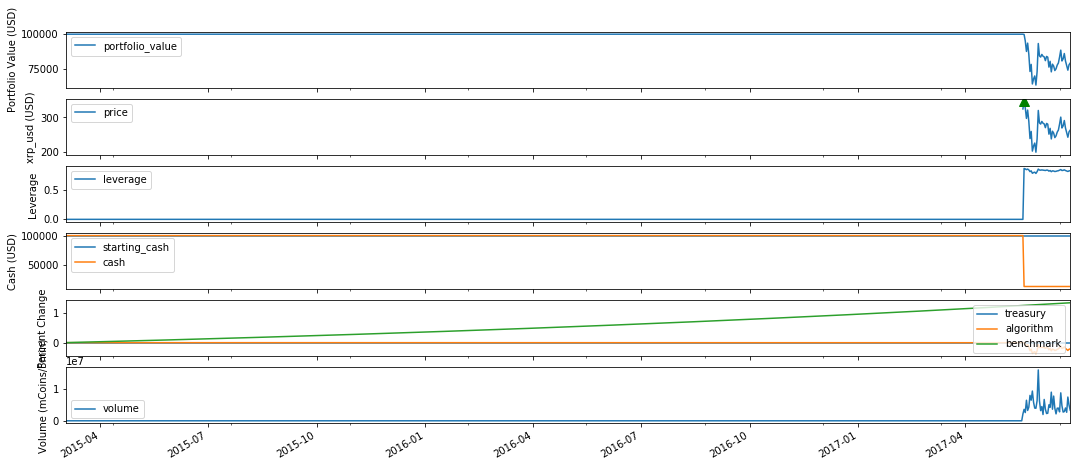

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,cash,ending_cash,ending_exposure,...,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,volume,treasury,algorithm,benchmark
2015-03-02 23:59:00+00:00,NaN,0.000000,None,0.001000,NaN,None,0.0,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,1,[],0.001,0.000000e+00,0.001,0.000000,0.001000
2015-03-03 23:59:00+00:00,0.000000,0.000000,None,0.002001,0.000000e+00,None,0.0,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,2,[],0.001,0.000000e+00,0.001,0.000000,0.002001
2015-03-04 23:59:00+00:00,0.000000,0.000000,None,0.003003,0.000000e+00,None,0.0,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,3,[],0.001,0.000000e+00,0.001,0.000000,0.003003
2015-03-05 23:59:00+00:00,0.000000,0.000000,None,0.004006,0.000000e+00,None,0.0,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,4,[],0.001,0.000000e+00,0.001,0.000000,0.004006
2015-03-06 23:59:00+00:00,0.000000,0.000000,None,0.005010,0.000000e+00,None,0.0,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,5,[],0.001,0.000000e+00,0.001,0.000000,0.005010
2015-03-07 23:59:00+00:00,0.000000,0.000000,None,0.006015,0.000000e+00,None,0.0,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,6,[],0.001,0.000000e+00,0.001,0.000000,0.006015
2015-03-08 23:59:00+00:00,0.000000,0.000000,None,0.007021,0.000000e+00,None,0.0,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,7,[],0.001,0.000000e+00,0.001,0.000000,0.007021
2015-03-09 23:59:00+00:00,0.000000,0.000000,None,0.008028,0.000000e+00,None,0.0,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,8,[],0.001,0.000000e+00,0.001,0.000000,0.008028
2015-03-10 23:59:00+00:00,0.000000,0.000000,None,0.009036,0.000000e+00,None,0.0,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,9,[],0.001,0.000000e+00,0.001,0.000000,0.009036
2015-03-11 23:59:00+00:00,0.000000,0.000000,None,0.010045,3.628434e-18,None,0.0,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,10,[],0.001,0.000000e+00,0.001,0.000000,0.010045


In [9]:
%%catalyst --start 2015-3-2 --end 2017-6-28 --capital-base 100000 -x bitfinex -c usd

from catalyst.finance.slippage import VolumeShareSlippage

from catalyst.api import (
    order_target_value,
    symbol,
    record,
    cancel_order,
    get_open_orders,
)

def initialize(context):
    context.ASSET_NAME = 'xrp_usd'
    context.TARGET_HODL_RATIO = 0.8
    context.RESERVE_RATIO = 1.0 - context.TARGET_HODL_RATIO

    # For all trading pairs in the poloniex bundle, the default denomination
    # currently supported by Catalyst is 1/1000th of a full coin. Use this
    # constant to scale the price of up to that of a full coin if desired.
    context.TICK_SIZE = 1000.0

    context.is_buying = True
    context.asset = symbol(context.ASSET_NAME)

    context.i = 0

def handle_data(context, data):
    context.i += 1

    starting_cash = context.portfolio.starting_cash
    target_hodl_value = context.TARGET_HODL_RATIO * starting_cash
    reserve_value = context.RESERVE_RATIO * starting_cash

    # Cancel any outstanding orders
    orders = get_open_orders(context.asset) or []
    for order in orders:
        cancel_order(order)

    # Stop buying after passing the reserve threshold
    cash = context.portfolio.cash
    if cash <= reserve_value:
        context.is_buying = False

    # Retrieve current asset price from pricing data
    price = data.current(context.asset, 'price')

    # Check if still buying and could (approximately) afford another purchase
    if context.is_buying and cash > price:
        # Place order to make position in asset equal to target_hodl_value
        order_target_value(
            context.asset,
            target_hodl_value,
            limit_price=price*1.1,
        )

    record(
        price=price,
        volume=data.current(context.asset, 'volume'),
        cash=cash,
        starting_cash=context.portfolio.starting_cash,
        leverage=context.account.leverage,
    )

def analyze(context=None, results=None):
    import matplotlib.pyplot as plt

    # Plot the portfolio and asset data.
    ax1 = plt.subplot(611)
    results[['portfolio_value']].plot(ax=ax1)
    ax1.set_ylabel('Portfolio Value (USD)')

    ax2 = plt.subplot(612, sharex=ax1)
    ax2.set_ylabel('{asset} (USD)'.format(asset=context.ASSET_NAME))
    (context.TICK_SIZE * results[['price']]).plot(ax=ax2)

    trans = results.ix[[t != [] for t in results.transactions]]
    buys = trans.ix[
        [t[0]['amount'] > 0 for t in trans.transactions]
    ]
    ax2.plot(
        buys.index,
        context.TICK_SIZE * results.price[buys.index],
        '^',
        markersize=10,
        color='g',
    )

    ax3 = plt.subplot(613, sharex=ax1)
    results[['leverage', 'alpha', 'beta']].plot(ax=ax3)
    ax3.set_ylabel('Leverage ')

    ax4 = plt.subplot(614, sharex=ax1)
    results[['starting_cash', 'cash']].plot(ax=ax4)
    ax4.set_ylabel('Cash (USD)')

    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]] = results[[
        'treasury_period_return',
        'algorithm_period_return',
        'benchmark_period_return',
    ]]

    ax5 = plt.subplot(615, sharex=ax1)
    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]].plot(ax=ax5)
    ax5.set_ylabel('Percent Change')

    ax6 = plt.subplot(616, sharex=ax1)
    results[['volume']].plot(ax=ax6)
    ax6.set_ylabel('Volume (mCoins/5min)')

    plt.legend(loc=3)

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()

### live Trading（实盘阶段）
#### 3.1 Supported Exchanges
Since version 0.4, Catalyst integrated with CCXT, a cryptocurrency trading library with support for more than 130 exchanges.

The exchanges available for backtesting are fully supported in live mode:

- Binance, id = binance
- Bitfinex, id = bitfinex
- Bittrex, id = bittrex
- Poloniex, id = poloniex

Additionally, we have successfully tested in live mode the following exchanges:
- GDAX, id = gdax
- HitBTC, id = hitbtc
- Huobi Pro, id = huobipro
- KuCoin, id = kucoin
- OKEX, id = okex

As Catalyst is currently in Alpha and is under active development, you are encouraged to thoroughly test any exchange in **paper trading mode before trading live with it**.

#### 3.2 Paper Trading vs Live Trading modes
currently supports three different modes in which you can execute your trading lgorithm：

- bactesting（回测）：uses historical data to run your algorithm. There is no interaction with the exchange in backtesting mode.
- paper trading(模拟交易）：The simulated algorithm runs in real time, and fetches pricing data in real time from the exchange, but the orders never reach the exchange, and are instead kept within Catalyst and simulated.
- live trading（实盘交易）：placing orders against the exchange. Real currency is transacted on the exchange driven by the algorithm.

#### 3.3 Authentication（认证）
Most exchanges require token key/secret combination for authentication. By convention, Catalyst uses an **auth.json** file to hold this data.

```
文件地址：~/.catalyst/data/exchanges/bitfinex/auth.json
{
  "name": "bitfinex",
  "key": "my-key",
  "secret": "my-secret"
}
```

<font color='red'>注意：windows电脑存放在以下目录,：C:\Users\Administrator\.catalyst\data\exchanges</font>

Attempting to run an algorithm where the targeted exchange is missing its auth.json file will create the directory structure and create an empty auth.json file, but will result in an error.

It is also possible to specify a different authentication file name using auth_aliases argument provided to the catalyst client or to the run_algorithm() interface.（也可以重新指定认证文件）

#### 3.4 Currency Symbols
Exchanges tend to use their own convention to represent currencies (e.g. XBT and BTC both represent Bitcoin on different exchanges). Trading pairs are also inconsistent. For example, Bitfinex puts the base currency before the quote currency without a separator, Bittrex puts the quote currency first and uses a dash separator.（交易所都有自己的交易对规范，格式不统一的问题）

catalyst的交易对规则是: **[Base Currency]_[Quote Currency] all lowercase**

Not all trading pairs are available on all exchanges. An error will occur if the specified trading pair is not trading on the exchange. To check which currency pairs are available on each of the supported exchanges, see [Catalyst Market Coverage.](https://enigma.co/catalyst/status/)

#### 3.5 Trading an Algorithm
The same algorithm should work in backtest and live execution mode without modification.
What **differs** are the arguments provided to the catalyst client or the run_algorithm() interface., Here is the same example in both interfaces.

- 命令行运行：catalyst live -f my_algo_code -x bitfinex -c btc -n my_algo_name

- run_algorithm()函数参数设置
```
run_algorithm(
    initialize=initialize,
    handle_data=handle_data,
    analyze=analyze,
    exchange_name='bitfinex',
    live=True,
    algo_namespace='my_algo_name',
    quote_currency='btc'
)
```

Here is the breakdown of the new arguments：

- *live**: Boolean flag which enables live trading. It defaults to False.
- **capital_base**: The amount of quote_currency assigned to the strategy. It has to be lower or equal to the amount of quote currency available for trading on the exchange
- **exchange_name**: The name of the targeted exchange. See the [CCXT Supported Exchanges](https://github.com/ccxt/ccxt/wiki/Exchange-Markets) for the full list.

- **algo_namespace**: A arbitrary label assigned to your algorithm for data storage purposes.
- **quote_currency**: The quote currency used to calculate the statistics of your algorithm. Currently, the quote currency of all trading pairs of your algorithm must match this value.
- **simulate_orders**: Enables the paper trading mode, in which orders are simulated in Catalyst instead of processed on the exchange. It defaults to True

#### 3.6 Algorithm State
In live mode, each call to handle data saves the state of the algorithm. Any information added to the context.state dictionary will be saved between runs. During algorithm restart, the state is restored (if exists) in the initialization function,Cleaning the state can be achieved by running:

```
catalyst clean-algo -n my-algo-namespace
```

#### 3.7 Commissions
In live mode, commissions are taken off according to what is reduced on the exchange. In some exchanges, the fee is always reduced from the quote currency where others reduce it from the currency that was bought. Meaning that when buying btc using the btc_usd trading pair, some exchanges will reduce the fee from the usd value, while others will reduce it from the btc value, which will result in a lower btc amount than the one originally specified. In live Catalyst supports both methods, since the fees are fetched directly from the exchanges. Currently, in paper trading and backtest modes the commissions are reduced always from the quote currency defined on the algorithm (**we will align these modes in the future with live mode**

#### 3.8 Advanced Options
In live and paper mode, in addition to the OHLCV data, the order book(买卖单明细） information is accessible as well, by running [get_orderbook](https://enigma.co/catalyst/appendix.html#catalyst.api.get_orderbook) API function. For example:

```
get_orderbook(symbol('etc_btc'), order_type='all', limit=10)
```

The following example returns a dictionary representing the order book in depth of 10 for etc_btc in Bitfinex. It is possible to retrieve only the bids or the asks from the order book by passing 'bids' or 'asks' in the order_type argument (by default this parameter receives the 'all' value).

In [15]:
!catalyst live --help

Usage: catalyst live [OPTIONS]

  Trade live with the given algorithm.

Options:
  -f, --algofile FILENAME         The file that contains the algorithm to run.
  --capital-base FLOAT            The amount of capital (in quote_currency)
                                  allocated to trading.
  -t, --algotext TEXT             The algorithm script to run.
  -D, --define TEXT               Define a name to be bound in the namespace
                                  before executing the algotext. For example
                                  '-Dname=value'. The value may be any python
                                  expression. These are evaluated in order so
                                  they may refer to previously defined names.
  -o, --output FILENAME           The location to write the perf data. If this
                                  is '-' the perf will be written to stdout.
                                  [default: -]
  --print-algo / --no-print-algo  Print the algorithm 

C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


### Pricing Data Intervals
#### 4.1 Stock trading
Counter-intuitively for novice traders, stock trading uses right-bound intervals,each interval is labeled with the ending time as follows:
 
```
9:31 interval: 9:30:00 am < t <= 9:31:00 am and is the first minute of a trading day
9:32 interval: 9:31:00 am < t <= 9:32:00 am
9:33 interval: 9:32:00 am < t <= 9:33:00 am
...
4:00 interval: 3:59:00 pm < t <= 4:00:00 pm and is the last minute of a trading day
```

#### 4.2 Crypto trading
Conversely, cryptocurrency trading exchanges use left-bounded (aka left-closed and left-labeled) minute and daily intervals.

```
9:31 interval: 9:31:00 am <= t < 9:32:00 am
9:32 interval: 9:32:00 am <= t < 9:33:00 am
9:33 interval: 9:33:00 am <= t < 9:34:00 am
```
For reference, in zipline when the clock ticks at the beginning of every minute, it uses data from the previous minute (labeled as ending in the current minute). To meet the different nature of the crypto data definition versus the stock market data, Catalyst code had to be altered as follows: when the minute clock ticks at the beginning of every minute data.current returns the closing price from the previous minute and data.history last bar matches data.current providing the price up to the minute prior to the current one.

### Example Algorithms

- examples/buy_btc_simple.py
- examples/buy_and_hodl.py
- examples/dual_moving_average.py
- examples/mean_reversion_simple.py
-  examples/simple_universe.py
- examples/portfolio_optimization.py

模拟交易测试，运行如下代码会在C:\Users\Administrator\.catalyst\data目录生产一个文件：live_algos\buy_btc_simple\

In [ ]:
## 模拟交易：起始日期必须是未来的日期
""""buy_btc_simple.py
    This is a very simple example referenced in the beginner's tutorial:
    https://enigmampc.github.io/catalyst/beginner-tutorial.html

    Run this example, by executing the following from your terminal:
      catalyst ingest-exchange -x bitfinex -f daily -i btc_usdt
      catalyst run -f buy_btc_simple.py -x bitfinex --start 2016-1-1 \
        --end 2017-9-30 -o buy_btc_simple_out.pickle

    If you want to run this code using another exchange, make sure that
    the asset is available on that exchange. For example, if you were to run
    it for exchange Poloniex, you would need to edit the following line:

        context.asset = symbol('btc_usdt')     # note 'usdt' instead of 'usd'

    and specify exchange poloniex as follows:
    catalyst ingest-exchange -x poloniex -f daily -i btc_usdt
    catalyst run -f buy_btc_simple.py -x poloniex --start 2016-1-1 \
        --end 2017-9-30 -o buy_btc_simple_out.pickle

    To see which assets are available on each exchange, visit:
    https://www.enigma.co/catalyst/status
"""
from catalyst import run_algorithm
from catalyst.api import order, record, symbol
import pandas as pd


def initialize(context):
    context.asset = symbol('btc_usdt')


def handle_data(context, data):
    order(context.asset, 1)
    record(btc=data.current(context.asset, 'price'))


if __name__ == '__main__':
    run_algorithm(
        capital_base=10000,
        data_frequency='minute',
        initialize=initialize,
        handle_data=handle_data,
        exchange_name='poloniex',
        algo_namespace='buy_btc_simple',
        quote_currency='usdt',
        start=pd.to_datetime('2019-02-18', utc=True),
        end=pd.to_datetime('2019-03-31', utc=True),
        live=True, 
        simulate_orders=True
    )

[2019-02-17 15:00:37.719093] INFO: run_algo: Catalyst version 0.5.21
[2019-02-17 15:00:37.732094] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2019-02-17 15:00:40.740266] INFO: run_algo: running algo in paper-trading mode
[2019-02-17 15:00:40.851272] INFO: ExchangeClock: The algorithm is waiting for the specified start date: 2019-02-18 00:00:00+00:00
[2019-02-18 12:14:48.538116] INFO: exchange_algorithm: portfolio balances, cash: 10000.0, positions: 0.0
[2019-02-18 12:14:59.235728] INFO: exchange_algorithm: statistics for the last 1 minutes:
                           starting_cash  ending_cash  portfolio_value  pnl  long_exposure  short_exposure  orders  transactions            btc
period_close                                                                                                           

[2019-02-18 12:24:02.960827] INFO: exchange_algorithm: portfolio balances, cash: -27540.92705287475, positions: 37455.1933607
[2019-02-18 12:24:04.025888] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                       symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash     portfolio_value pnl          long_exposure short_exposure orders transactions btc                                                            
2019-02-18 12:25:00+00:00 10000         -27540.92705287 9914.26630783   -85.73369217 37455.1933607 0              1      1            3745.51933607  btc_usdt      10  3754.09270529    3745.51933607
[2019-02-18 12:25:02.535235] INFO: exchange_algorithm: portfolio balances, cash: -31296.185675708657, positions: 41200.71269798
[2019-02-18 12:25:03.603296] INFO: exchange_algorithm: statist

[2019-02-18 12:34:04.479232] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                        symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash     portfolio_value pnl           long_exposure short_exposure orders transactions btc                                                            
2019-02-18 12:35:00+00:00 10000         -65101.53644533 9825.47976327   -174.52023673 74927.0162086 0              1      1            3746.35081043  btc_usdt      20  3755.07682227    3746.35081043
[2019-02-18 12:35:03.156588] INFO: exchange_algorithm: portfolio balances, cash: -68857.62870445472, positions: 78673.36701903
[2019-02-18 12:35:05.034696] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                

[2019-02-18 12:45:02.698880] INFO: exchange_algorithm: portfolio balances, cash: -106497.49927977184, positions: 116405.0
[2019-02-18 12:45:03.703938] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                 symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl          long_exposure short_exposure orders transactions btc                                                     
2019-02-18 12:46:00+00:00 10000         -106497.49927977 9907.50072023   -92.49927977 116405.0      0              1      1            3755.0  btc_usdt      31  3757.98384773           3755.0
[2019-02-18 12:46:04.056390] INFO: exchange_algorithm: portfolio balances, cash: -110263.11304766903, positions: 120187.12400352
[2019-02-18 12:46:05.079448] INFO: exchange_algorithm: statistics for the last 1 mi

[2019-02-18 12:55:24.735459] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                        symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl          long_exposure  short_exposure orders transactions btc                                                           
2019-02-18 12:56:00+00:00 10000         -144188.26309782 10264.45597578  264.45597578 154452.7190736 0              1      1            3767.1394896  btc_usdt      41  3760.68934385     3767.1394896
[2019-02-18 12:56:14.807323] INFO: exchange_algorithm: portfolio balances, cash: -147965.19809187923, positions: 158219.85856320002
[2019-02-18 12:56:17.202460] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                           

[2019-02-18 13:04:07.207342] INFO: exchange_algorithm: portfolio balances, cash: -178189.94244418066, positions: 188207.585638
[2019-02-18 13:04:08.516417] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                       symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl         long_exposure short_exposure orders transactions btc                                                            
2019-02-18 13:05:00+00:00 10000         -178189.94244418 10017.64319382  17.64319382 188207.585638 0              1      1            3764.15171276  btc_usdt      50  3763.79884888    3764.15171276
[2019-02-18 13:05:17.252349] WARNING: CCXT: unable to fetch ticker poloniex / BTC/USDT: poloniex GET https://poloniex.com/public?command=returnTicker HTTPSConnectionPool(host='poloniex.com'

[2019-02-18 13:12:16.573332] WARNING: CCXT: unable to fetch ticker poloniex / BTC/USDT: poloniex https://poloniex.com/public?command=returnTicker GET HTTPSConnectionPool(host='poloniex.com', port=443): Read timed out.
[2019-02-18 13:12:16.579333] WARNING: DataPortalExchange: fetching spot value again.
[2019-02-18 13:12:29.984100] WARNING: CCXT: unable to fetch ticker poloniex / BTC/USDT: poloniex https://poloniex.com/public?command=returnTicker GET HTTPSConnectionPool(host='poloniex.com', port=443): Max retries exceeded with url: /public?command=returnTicker (Caused by SSLError(SSLError("bad handshake: SysCallError(10053, 'WSAECONNABORTED')",),))
[2019-02-18 13:12:29.988100] WARNING: DataPortalExchange: fetching spot value again.
C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\redo\__init__.py:173: ResourceWarning: unclosed <socket.socket fd=2380, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('0.0.0.0', 52884), raddr=('104.17.52.6', 443

[2019-02-18 13:20:12.942579] WARNING: CCXT: unable to fetch ticker poloniex / BTC/USDT: poloniex GET https://poloniex.com/public?command=returnTicker HTTPSConnectionPool(host='poloniex.com', port=443): Read timed out. (read timeout=10)
[2019-02-18 13:20:12.948580] WARNING: exchange_algorithm: Syncing portfolio again.
[2019-02-18 13:20:18.968924] INFO: exchange_algorithm: portfolio balances, cash: -238549.64288429968, positions: 248849.72980757998
[2019-02-18 13:20:19.641962] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                         symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash     portfolio_value pnl          long_exposure   short_exposure orders transactions btc                                                            
2019-02-18 13:21:00+00:00 10000         -238549.6428843 103

[2019-02-18 13:30:03.306346] INFO: exchange_algorithm: portfolio balances, cash: -276501.9111410716, positions: 288800.0
[2019-02-18 13:30:05.135451] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                  symbol  amount    cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl           long_exposure short_exposure orders transactions btc                                                    
2019-02-18 13:31:00+00:00 10000         -276501.91114107 12298.08885893  2298.08885893 288800.0      0              1      1            3800.0  btc_usdt      76  3769.7619887           3800.0
[2019-02-18 13:31:03.573793] INFO: exchange_algorithm: portfolio balances, cash: -280312.9255306542, positions: 292687.04850000003
[2019-02-18 13:31:04.612853] INFO: exchange_algorithm: statistics for the last 1 m

[2019-02-18 13:40:05.316779] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                      symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl           long_exposure short_exposure orders transactions btc                                                         
2019-02-18 13:41:00+00:00 10000         -314587.81261922 11438.67414078  1438.67414078 326026.48676  0              1      1            3791.00566  btc_usdt      86  3774.27689092       3791.00566
[2019-02-18 13:41:03.421103] INFO: exchange_algorithm: portfolio balances, cash: -318388.67584168375, positions: 329817.49241999997
[2019-02-18 13:41:05.485221] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                 

[2019-02-18 13:50:03.064968] INFO: exchange_algorithm: portfolio balances, cash: -352826.5007736688, positions: 367200.0
[2019-02-18 13:50:04.373043] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                  symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl           long_exposure short_exposure orders transactions btc                                                     
2019-02-18 13:51:00+00:00 10000         -352826.50077367 14373.49922633  4373.49922633 367200.0      0              1      1            3825.0  btc_usdt      96  3779.44271639           3825.0
[2019-02-18 13:51:04.361474] INFO: exchange_algorithm: portfolio balances, cash: -356665.95843104384, positions: 371461.5
[2019-02-18 13:51:06.935622] INFO: exchange_algorithm: statistics for the last 1 minutes

[2019-02-18 14:00:03.395305] INFO: exchange_algorithm: portfolio balances, cash: -391264.867424196, positions: 405952.01162538
[2019-02-18 14:00:04.367361] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                          symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash     portfolio_value pnl           long_exposure   short_exposure orders transactions btc                                                            
2019-02-18 14:01:00+00:00 10000         -391264.8674242 14687.14420118  4687.14420118 405952.01162538 0              1      1            3829.73595873  btc_usdt     106  3785.51761721    3829.73595873
[2019-02-18 14:01:02.967713] INFO: exchange_algorithm: portfolio balances, cash: -395094.19881905604, positions: 408675.80000107
[2019-02-18 14:01:04.017773] INFO: exchange_algorit

[2019-02-18 14:10:04.835706] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                  symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl           long_exposure short_exposure orders transactions btc                                                     
2019-02-18 14:11:00+00:00 10000         -429573.05207056 13778.94792944  3778.94792944 443352.0      0              1      1            3822.0  btc_usdt     116  3789.42286268           3822.0
[2019-02-18 14:11:02.738018] INFO: exchange_algorithm: portfolio balances, cash: -433405.5975911687, positions: 447244.8774183
[2019-02-18 14:11:04.199101] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                  

[2019-02-18 14:21:03.242364] INFO: exchange_algorithm: portfolio balances, cash: -471776.7701771505, positions: 487208.65610017
[2019-02-18 14:21:04.302425] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                           symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl           long_exposure   short_exposure orders transactions btc                                                            
2019-02-18 14:22:00+00:00 10000         -471776.77017715 15431.88592302  5431.88592302 487208.65610017 0              1      1            3836.28863071  btc_usdt     127  3793.51787541    3836.28863071
[2019-02-18 14:22:03.205794] INFO: exchange_algorithm: portfolio balances, cash: -475624.72310022, positions: 491260.57384576
[2019-02-18 14:22:04.147848] INFO: exchange_algori

[2019-02-18 14:31:04.483753] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                           symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl           long_exposure   short_exposure orders transactions btc                                                            
2019-02-18 14:32:00+00:00 10000         -510294.17586211 15357.69484568  5357.69484568 525651.87070779 0              1      1            3836.87496867  btc_usdt     137  3797.76770702    3836.87496867
[2019-02-18 14:32:06.410295] INFO: exchange_algorithm: portfolio balances, cash: -514140.7734267352, positions: 529453.75180068
[2019-02-18 14:32:07.499358] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                      

[2019-02-18 14:41:05.133109] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                     symbol  amount    cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl           long_exposure short_exposure orders transactions btc                                                       
2019-02-18 14:42:00+00:00 10000         -548690.32070974 12533.26179026  2533.26179026 561223.5825   0              1      1            3817.8475  btc_usdt     147  3800.6144266        3817.8475
[2019-02-18 14:42:03.475446] INFO: exchange_algorithm: portfolio balances, cash: -552520.4244577568, positions: 565385.21180888
[2019-02-18 14:42:04.557508] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                           

[2019-02-18 14:52:04.294811] INFO: exchange_algorithm: portfolio balances, cash: -590786.6420215539, positions: 605390.81378042
[2019-02-18 14:52:06.709949] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                           symbol  amount    cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl           long_exposure   short_exposure orders transactions btc                                                           
2019-02-18 14:53:00+00:00 10000         -590786.64202155 14604.17175887  4604.17175887 605390.81378042 0              1      1            3831.58742899  btc_usdt     158  3802.4471014    3831.58742899
[2019-02-18 14:53:03.426193] INFO: exchange_algorithm: portfolio balances, cash: -594627.9315198197, positions: 609181.00731
[2019-02-18 14:53:04.486253] INFO: exchange_algorithm:

[2019-02-18 15:03:03.555518] INFO: exchange_algorithm: portfolio balances, cash: -632865.1773800831, positions: 643721.0
[2019-02-18 15:03:05.052604] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                 symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash      portfolio_value pnl          long_exposure short_exposure orders transactions btc                                                     
2019-02-18 15:04:00+00:00 10000         -632865.17738008 10855.82261992  855.82261992 643721.0      0              1      1            3809.0  btc_usdt     169  3803.93596083           3809.0
[2019-02-18 15:04:12.469460] INFO: exchange_algorithm: portfolio balances, cash: -636682.3112405518, positions: 647229.797
[2019-02-18 15:04:13.577523] INFO: exchange_algorithm: statistics for the last 1 minutes:


[2019-02-18 15:13:04.761905] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                                                                     symbol  amount     cost_basis  last_sale_price
period_close              starting_cash ending_cash     portfolio_value pnl           long_exposure short_exposure orders transactions btc                                                         
2019-02-18 15:14:00+00:00 10000         -670943.7203855 8126.6231445    -1873.3768555 679070.34353  0              1      1            3793.68907  btc_usdt     179  3804.15486249       3793.68907
[2019-02-18 15:14:03.420260] INFO: exchange_algorithm: portfolio balances, cash: -674753.6013355033, positions: 684000.0
[2019-02-18 15:14:05.067354] INFO: exchange_algorithm: statistics for the last 1 minutes:
                                                                                                               

[2019-02-18 15:22:41.629900] INFO: exchange_algorithm: Interruption signal detected 2, exiting the algorithm
[2019-02-18 15:22:41.633900] INFO: exchange_algorithm: Exiting the algorithm.


[2019-02-17 13:34:58.257133] INFO: run_algo: Catalyst version 0.5.21
[2019-02-17 13:34:58.286134] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2019-02-17 13:35:01.298307] INFO: run_algo: running algo in backtest mode
[2019-02-17 13:35:01.526320] INFO: exchange_algorithm: initialized trading algorithm in backtest mode


buying


[2019-02-17 13:35:06.873625] INFO: Performance: Simulated 976 trading days out of 976.
[2019-02-17 13:35:06.881626] INFO: Performance: first open: 2015-03-01 00:00:00+00:00
[2019-02-17 13:35:06.885626] INFO: Performance: last close: 2017-10-31 23:59:00+00:00


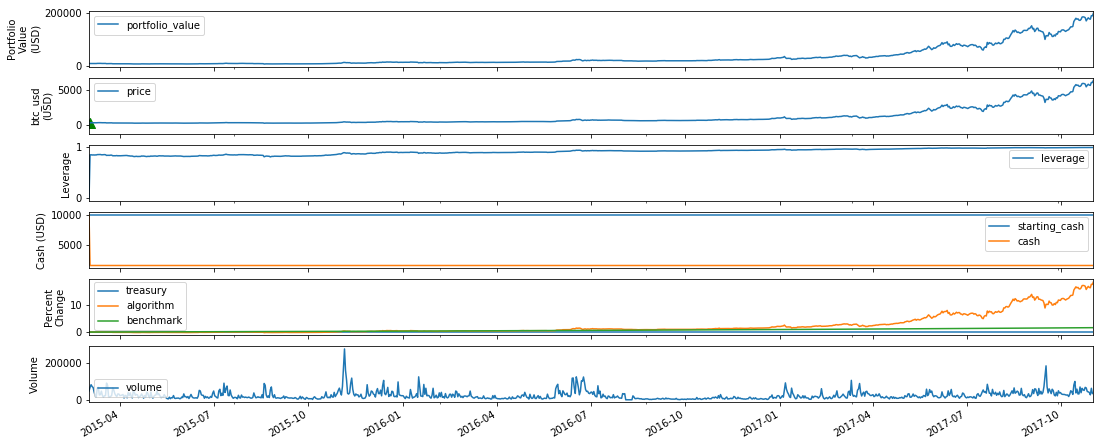

In [3]:
# 回测1:buy_and_hodl.py
#!/usr/bin/env python
#
# Copyright 2017 Enigma MPC, Inc.
# Copyright 2015 Quantopian, Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
import pandas as pd
import matplotlib.pyplot as plt

from catalyst import run_algorithm
from catalyst.api import (order_target_value, symbol, record,
                          cancel_order, get_open_orders, )


def initialize(context):
    context.ASSET_NAME = 'btc_usd'
    context.TARGET_HODL_RATIO = 0.8
    context.RESERVE_RATIO = 1.0 - context.TARGET_HODL_RATIO

    context.is_buying = True
    context.asset = symbol(context.ASSET_NAME)

    context.i = 0


def handle_data(context, data):
    context.i += 1

    starting_cash = context.portfolio.starting_cash
    target_hodl_value = context.TARGET_HODL_RATIO * starting_cash
    reserve_value = context.RESERVE_RATIO * starting_cash

    # Cancel any outstanding orders
    orders = get_open_orders(context.asset) or []
    for order in orders:
        cancel_order(order)

    # Stop buying after passing the reserve threshold
    cash = context.portfolio.cash
    if cash <= reserve_value:
        context.is_buying = False

    # Retrieve current asset price from pricing data
    price = data.current(context.asset, 'price')

    # Check if still buying and could (approximately) afford another purchase
    if context.is_buying and cash > price:
        print('buying')
        # Place order to make position in asset equal to target_hodl_value
        order_target_value(
            context.asset,
            target_hodl_value,
            limit_price=price * 1.1,
        )

    record(
        price=price,
        volume=data.current(context.asset, 'volume'),
        cash=cash,
        starting_cash=context.portfolio.starting_cash,
        leverage=context.account.leverage,
    )


def analyze(context=None, results=None):

    # Plot the portfolio and asset data.
    ax1 = plt.subplot(611)
    results[['portfolio_value']].plot(ax=ax1)
    ax1.set_ylabel('Portfolio\nValue\n(USD)')

    ax2 = plt.subplot(612, sharex=ax1)
    ax2.set_ylabel('{asset}\n(USD)'.format(asset=context.ASSET_NAME))
    results[['price']].plot(ax=ax2)

    trans = results.ix[[t != [] for t in results.transactions]]
    buys = trans.ix[
        [t[0]['amount'] > 0 for t in trans.transactions]
    ]
    ax2.scatter(
        buys.index.to_pydatetime(),
        results.price[buys.index],
        marker='^',
        s=100,
        c='g',
        label=''
    )

    ax3 = plt.subplot(613, sharex=ax1)
    results[['leverage', 'alpha', 'beta']].plot(ax=ax3)
    ax3.set_ylabel('Leverage ')

    ax4 = plt.subplot(614, sharex=ax1)
    results[['starting_cash', 'cash']].plot(ax=ax4)
    ax4.set_ylabel('Cash (USD)')

    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]] = results[[
        'treasury_period_return',
        'algorithm_period_return',
        'benchmark_period_return',
    ]]

    ax5 = plt.subplot(615, sharex=ax1)
    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]].plot(ax=ax5)
    ax5.set_ylabel('Percent\nChange')

    ax6 = plt.subplot(616, sharex=ax1)
    results[['volume']].plot(ax=ax6)
    ax6.set_ylabel('Volume')

    plt.legend(loc=3)

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()


if __name__ == '__main__':
    run_algorithm(
        capital_base=10000,
        data_frequency='daily',
        initialize=initialize,
        handle_data=handle_data,
        analyze=analyze,
        exchange_name='bitfinex',
        algo_namespace='buy_and_hodl',
        quote_currency='usdt',
        start=pd.to_datetime('2015-03-01', utc=True),
        end=pd.to_datetime('2017-10-31', utc=True),
    )

In [8]:
#回测2：dual_moving_average.py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from logbook import Logger

from catalyst import run_algorithm
from catalyst.api import (record, symbol, order_target_percent,)
from catalyst.exchange.utils.stats_utils import extract_transactions

NAMESPACE = 'dual_moving_average'
log = Logger(NAMESPACE)


def initialize(context):
    context.i = 0
    context.asset = symbol('btc_usd')
    context.base_price = None


def handle_data(context, data):
    # define the windows for the moving averages
    short_window = 50
    long_window = 200

    # Skip as many bars as long_window to properly compute the average
    context.i += 1
    if context.i < long_window:
        return

    # Compute moving averages calling data.history() for each
    # moving average with the appropriate parameters. We choose to use
    # minute bars for this simulation -> freq="1m"
    # Returns a pandas dataframe.
    short_data = data.history(context.asset,
                              'price',
                              bar_count=short_window,
                              frequency="1T",
                              )
    short_mavg = short_data.mean()
    long_data = data.history(context.asset,
                             'price',
                             bar_count=long_window,
                             frequency="1T",
                             )
    long_mavg = long_data.mean()

    # Let's keep the price of our asset in a more handy variable
    price = data.current(context.asset, 'price')

    # If base_price is not set, we use the current value. This is the
    # price at the first bar which we reference to calculate price_change.
    if context.base_price is None:
        context.base_price = price
    price_change = (price - context.base_price) / context.base_price

    # Save values for later inspection
    record(price=price,
           cash=context.portfolio.cash,
           price_change=price_change,
           short_mavg=short_mavg,
           long_mavg=long_mavg)

    # Since we are using limit orders, some orders may not execute immediately
    # we wait until all orders are executed before considering more trades.
    orders = context.blotter.open_orders
    if len(orders) > 0:
        return

    # Exit if we cannot trade
    if not data.can_trade(context.asset):
        return

    # We check what's our position on our portfolio and trade accordingly
    pos_amount = context.portfolio.positions[context.asset].amount

    # Trading logic
    if short_mavg > long_mavg and pos_amount == 0:
        # we buy 100% of our portfolio for this asset
        order_target_percent(context.asset, 1)
    elif short_mavg < long_mavg and pos_amount > 0:
        # we sell all our positions for this asset
        order_target_percent(context.asset, 0)


def analyze(context, perf):
    # Get the quote_currency that was passed as a parameter to the simulation
    exchange = list(context.exchanges.values())[0]
    quote_currency = exchange.quote_currency.upper()

    # First chart: Plot portfolio value using quote_currency
    ax1 = plt.subplot(411)
    perf.loc[:, ['portfolio_value']].plot(ax=ax1)
    ax1.legend_.remove()
    ax1.set_ylabel('Portfolio Value\n({})'.format(quote_currency))
    start, end = ax1.get_ylim()
    ax1.yaxis.set_ticks(np.arange(start, end, (end - start) / 5))

    # Second chart: Plot asset price, moving averages and buys/sells
    ax2 = plt.subplot(412, sharex=ax1)
    perf.loc[:, ['price', 'short_mavg', 'long_mavg']].plot(
        ax=ax2,
        label='Price')
    ax2.legend_.remove()
    ax2.set_ylabel('{asset}\n({quote})'.format(
        asset=context.asset.symbol,
        quote=quote_currency
    ))
    start, end = ax2.get_ylim()
    ax2.yaxis.set_ticks(np.arange(start, end, (end - start) / 5))

    transaction_df = extract_transactions(perf)
    if not transaction_df.empty:
        buy_df = transaction_df[transaction_df['amount'] > 0]
        sell_df = transaction_df[transaction_df['amount'] < 0]
        ax2.scatter(
            buy_df.index.to_pydatetime(),
            perf.loc[buy_df.index, 'price'],
            marker='^',
            s=100,
            c='green',
            label=''
        )
        ax2.scatter(
            sell_df.index.to_pydatetime(),
            perf.loc[sell_df.index, 'price'],
            marker='v',
            s=100,
            c='red',
            label=''
        )

    # Third chart: Compare percentage change between our portfolio
    # and the price of the asset
    ax3 = plt.subplot(413, sharex=ax1)
    perf.loc[:, ['algorithm_period_return', 'price_change']].plot(ax=ax3)
    ax3.legend_.remove()
    ax3.set_ylabel('Percent Change')
    start, end = ax3.get_ylim()
    ax3.yaxis.set_ticks(np.arange(start, end, (end - start) / 5))

    # Fourth chart: Plot our cash
    ax4 = plt.subplot(414, sharex=ax1)
    perf.cash.plot(ax=ax4)
    ax4.set_ylabel('Cash\n({})'.format(quote_currency))
    start, end = ax4.get_ylim()
    ax4.yaxis.set_ticks(np.arange(0, end, end / 5))

    plt.show()


if __name__ == '__main__':

    run_algorithm(
            capital_base=1000,
            data_frequency='minute',
            initialize=initialize,
            handle_data=handle_data,
            analyze=analyze,
            exchange_name='bitfinex',
            algo_namespace=NAMESPACE,
            quote_currency='usd',
            start=pd.to_datetime('2019-2-12', utc=True),
            end=pd.to_datetime('2019-2-17', utc=True),
        )

[2019-02-17 14:13:40.263944] INFO: run_algo: Catalyst version 0.5.21
[2019-02-17 14:13:40.275945] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2019-02-17 14:13:43.284117] INFO: run_algo: running algo in backtest mode
[2019-02-17 14:13:43.305118] INFO: exchange_algorithm: initialized trading algorithm in backtest mode


PricingDataNotLoadedError: Missing data for bitfinex btc_usd in date range [2019-02-12 02:29:00+00:00 - 2019-02-12 03:18:00+00:00]
Please run: `catalyst ingest-exchange -x bitfinex -f minute -i btc_usd`. See catalyst documentation for details.

In [ ]:
##回测4+实盘：mean_reversion_simple.py
# For this example, we're going to write a simple momentum script.  When the
# stock goes up quickly, we're going to buy; when it goes down quickly, we're
# going to sell.  Hopefully we'll ride the waves.
import os
import tempfile
import time

import numpy as np
import pandas as pd
import talib
from logbook import Logger

from catalyst import run_algorithm
from catalyst.api import symbol, record, order_target_percent
from catalyst.exchange.utils.stats_utils import extract_transactions
# We give a name to the algorithm which Catalyst will use to persist its state.
# In this example, Catalyst will create the `.catalyst/data/live_algos`
# directory. If we stop and start the algorithm, Catalyst will resume its
# state using the files included in the folder.
from catalyst.utils.paths import ensure_directory

NAMESPACE = 'mean_reversion_simple'
log = Logger(NAMESPACE)


# To run an algorithm in Catalyst, you need two functions: initialize and
# handle_data.

def initialize(context):
    # This initialize function sets any data or variables that you'll use in
    # your algorithm.  For instance, you'll want to define the trading pair (or
    # trading pairs) you want to backtest.  You'll also want to define any
    # parameters or values you're going to use.

    # In our example, we're looking at Neo in Ether.
    context.market = symbol('bnb_eth')
    context.base_price = None
    context.current_day = None

    context.RSI_OVERSOLD = 60
    context.RSI_OVERBOUGHT = 70
    context.CANDLE_SIZE = '15T'

    context.start_time = time.time()

    context.set_commission(maker=0.001, taker=0.002)
    context.set_slippage(slippage=0.001)


def handle_data(context, data):
    # This handle_data function is where the real work is done.  Our data is
    # minute-level tick data, and each minute is called a frame.  This function
    # runs on each frame of the data.

    # We flag the first period of each day.
    # Since cryptocurrencies trade 24/7 the `before_trading_starts` handle
    # would only execute once. This method works with minute and daily
    # frequencies.
    today = data.current_dt.floor('1D')
    if today != context.current_day:
        context.traded_today = False
        context.current_day = today

    # We're computing the volume-weighted-average-price of the security
    # defined above, in the context.market variable.  For this example, we're
    # using three bars on the 15 min bars.

    # The frequency attribute determine the bar size. We use this convention
    # for the frequency alias:
    # http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    prices = data.history(
        context.market,
        fields='close',
        bar_count=50,
        frequency=context.CANDLE_SIZE
    )

    # Ta-lib calculates various technical indicator based on price and
    # volume arrays.

    # In this example, we are comp
    rsi = talib.RSI(prices.values, timeperiod=14)

    # We need a variable for the current price of the security to compare to
    # the average. Since we are requesting two fields, data.current()
    # returns a DataFrame with
    current = data.current(context.market, fields=['close', 'volume'])
    price = current['close']

    # If base_price is not set, we use the current value. This is the
    # price at the first bar which we reference to calculate price_change.
    if context.base_price is None:
        context.base_price = price

    price_change = (price - context.base_price) / context.base_price
    cash = context.portfolio.cash

    # Now that we've collected all current data for this frame, we use
    # the record() method to save it. This data will be available as
    # a parameter of the analyze() function for further analysis.

    record(
        volume=current['volume'],
        price=price,
        price_change=price_change,
        rsi=rsi[-1],
        cash=cash
    )
    # We are trying to avoid over-trading by limiting our trades to
    # one per day.
    if context.traded_today:
        return

    # TODO: retest with open orders
    # Since we are using limit orders, some orders may not execute immediately
    # we wait until all orders are executed before considering more trades.
    orders = context.blotter.open_orders
    if len(orders) > 0:
        log.info('exiting because orders are open: {}'.format(orders))
        return

    # Exit if we cannot trade
    if not data.can_trade(context.market):
        return

    # Another powerful built-in feature of the Catalyst backtester is the
    # portfolio object.  The portfolio object tracks your positions, cash,
    # cost basis of specific holdings, and more.  In this line, we calculate
    # how long or short our position is at this minute.
    pos_amount = context.portfolio.positions[context.market].amount

    if rsi[-1] <= context.RSI_OVERSOLD and pos_amount == 0:
        log.info(
            '{}: buying - price: {}, rsi: {}'.format(
                data.current_dt, price, rsi[-1]
            )
        )
        # Set a style for limit orders,
        limit_price = price * 1.005
        order_target_percent(
            context.market, 1, limit_price=limit_price
        )
        context.traded_today = True

    elif rsi[-1] >= context.RSI_OVERBOUGHT and pos_amount > 0:
        log.info(
            '{}: selling - price: {}, rsi: {}'.format(
                data.current_dt, price, rsi[-1]
            )
        )
        limit_price = price * 0.995
        order_target_percent(
            context.market, 0, limit_price=limit_price
        )
        context.traded_today = True


def analyze(context=None, perf=None):
    end = time.time()
    log.info('elapsed time: {}'.format(end - context.start_time))

    import matplotlib.pyplot as plt
    # The quote currency of the algo exchange
    quote_currency = list(context.exchanges.values())[0].quote_currency.upper()

    # Plot the portfolio value over time.
    ax1 = plt.subplot(611)
    perf.loc[:, 'portfolio_value'].plot(ax=ax1)
    ax1.set_ylabel('Portfolio\nValue\n({})'.format(quote_currency))

    # Plot the price increase or decrease over time.
    ax2 = plt.subplot(612, sharex=ax1)
    perf.loc[:, 'price'].plot(ax=ax2, label='Price')

    ax2.set_ylabel('{asset}\n({quote})'.format(
        asset=context.market.symbol, quote=quote_currency
    ))

    transaction_df = extract_transactions(perf)
    if not transaction_df.empty:
        buy_df = transaction_df[transaction_df['amount'] > 0]
        sell_df = transaction_df[transaction_df['amount'] < 0]
        ax2.scatter(
            buy_df.index.to_pydatetime(),
            perf.loc[buy_df.index.floor('1 min'), 'price'],
            marker='^',
            s=100,
            c='green',
            label=''
        )
        ax2.scatter(
            sell_df.index.to_pydatetime(),
            perf.loc[sell_df.index.floor('1 min'), 'price'],
            marker='v',
            s=100,
            c='red',
            label=''
        )

    ax4 = plt.subplot(613, sharex=ax1)
    perf.loc[:, 'cash'].plot(
        ax=ax4, label='Quote Currency ({})'.format(quote_currency)
    )
    ax4.set_ylabel('Cash\n({})'.format(quote_currency))

    perf['algorithm'] = perf.loc[:, 'algorithm_period_return']

    ax5 = plt.subplot(614, sharex=ax1)
    perf.loc[:, ['algorithm', 'price_change']].plot(ax=ax5)
    ax5.set_ylabel('Percent\nChange')

    ax6 = plt.subplot(615, sharex=ax1)
    perf.loc[:, 'rsi'].plot(ax=ax6, label='RSI')
    ax6.set_ylabel('RSI')
    ax6.axhline(context.RSI_OVERBOUGHT, color='darkgoldenrod')
    ax6.axhline(context.RSI_OVERSOLD, color='darkgoldenrod')

    if not transaction_df.empty:
        ax6.scatter(
            buy_df.index.to_pydatetime(),
            perf.loc[buy_df.index.floor('1 min'), 'rsi'],
            marker='^',
            s=100,
            c='green',
            label=''
        )
        ax6.scatter(
            sell_df.index.to_pydatetime(),
            perf.loc[sell_df.index.floor('1 min'), 'rsi'],
            marker='v',
            s=100,
            c='red',
            label=''
        )
    plt.legend(loc=3)
    start, end = ax6.get_ylim()
    ax6.yaxis.set_ticks(np.arange(0, end, end / 5))

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()
    pass


if __name__ == '__main__':
    # The execution mode: backtest or live
    live = True

    if live:
        run_algorithm(
            capital_base=0.1,
            initialize=initialize,
            handle_data=handle_data,
            analyze=analyze,
            exchange_name='binance',
            live=True,
            algo_namespace=NAMESPACE,
            quote_currency='eth',
            live_graph=False,
            simulate_orders=False,
            stats_output=None,
            # auth_aliases=dict(poloniex='auth2')
        )

    else:
        folder = os.path.join(
            tempfile.gettempdir(), 'catalyst', NAMESPACE
        )
        ensure_directory(folder)

        timestr = time.strftime('%Y%m%d-%H%M%S')
        out = os.path.join(folder, '{}.p'.format(timestr))
        # catalyst run -f catalyst/examples/mean_reversion_simple.py \
        #    -x bitfinex -s 2017-10-1 -e 2017-11-10 -c usdt -n mean-reversion \
        #   --data-frequency minute --capital-base 10000
        run_algorithm(
            capital_base=0.035,
            data_frequency='minute',
            initialize=initialize,
            handle_data=handle_data,
            analyze=analyze,
            exchange_name='bitfinex',
            algo_namespace=NAMESPACE,
            quote_currency='btc',
            start=pd.to_datetime('2017-10-01', utc=True),
            end=pd.to_datetime('2017-11-10', utc=True),
            output=out
        )
        log.info('saved perf stats: {}'.format(out))

In [ ]:
#回测5：simple_universe.py
"""
Requires Catalyst version 0.3.0 or above
Tested on Catalyst version 0.3.3

This example aims to provide an easy way for users to learn how to
collect data from any given exchange and select a subset of the available
currency pairs for trading. You simply need to specify the exchange and
the market (quote_currency) that you want to focus on. You will then see
how to create a universe of assets, and filter it based the market you
desire.

The example prints out the closing price of all the pairs for a given
market in a given exchange every 30 minutes. The example also contains
the OHLCV data with minute-resolution for the past seven days which
could be used to create indicators. Use this code as the backbone to
create your own trading strategy.

The lookback_date variable is used to ensure data for a coin existed on
the lookback period specified.

To run, execute the following two commands in a terminal (inside catalyst
environment). The first one retrieves all the pricing data needed for this
script to run (only needs to be run once), and the second one executes this
script with the parameters specified in the run_algorithm() call at the end
of the file:

catalyst ingest-exchange -x bitfinex -f minute

python simple_universe.py

"""
from datetime import timedelta

import numpy as np
import pandas as pd

from catalyst import run_algorithm
from catalyst.api import (symbols, )
from catalyst.exchange.utils.exchange_utils import get_exchange_symbols


def initialize(context):
    context.i = -1  # minute counter
    context.exchange = list(context.exchanges.values())[0].name.lower()
    context.quote_currency = list(
        context.exchanges.values())[0].quote_currency.lower()


def handle_data(context, data):
    context.i += 1
    lookback_days = 7  # 7 days

    # current date & time in each iteration formatted into a string
    now = data.current_dt
    date, time = now.strftime('%Y-%m-%d %H:%M:%S').split(' ')
    lookback_date = now - timedelta(days=lookback_days)
    # keep only the date as a string, discard the time
    lookback_date = lookback_date.strftime('%Y-%m-%d %H:%M:%S').split(' ')[0]

    one_day_in_minutes = 1440  # 60 * 24 assumes data_frequency='minute'
    # update universe everyday at midnight
    if not context.i % one_day_in_minutes:
        context.universe = universe(context, lookback_date, date)

    # get data every 30 minutes
    minutes = 30

    # get lookback_days of history data: that is 'lookback' number of bins
    lookback = int(one_day_in_minutes / minutes * lookback_days)
    if not context.i % minutes and context.universe:
        # we iterate for every pair in the current universe
        for coin in context.coins:
            pair = str(coin.symbol)

            # Get 30 minute interval OHLCV data. This is the standard data
            # required for candlestick or indicators/signals. Return Pandas
            # DataFrames. 30T means 30-minute re-sampling of one minute data.
            # Adjust it to your desired time interval as needed.
            opened = fill(data.history(coin,
                                       'open',
                                       bar_count=lookback,
                                       frequency='30T')).values
            high = fill(data.history(coin,
                                     'high',
                                     bar_count=lookback,
                                     frequency='30T')).values
            low = fill(data.history(coin,
                                    'low',
                                    bar_count=lookback,
                                    frequency='30T')).values
            close = fill(data.history(coin,
                                      'price',
                                      bar_count=lookback,
                                      frequency='30T')).values
            volume = fill(data.history(coin,
                                       'volume',
                                       bar_count=lookback,
                                       frequency='30T')).values

            # close[-1] is the last value in the set, which is the equivalent
            # to current price (as in the most recent value)
            # displays the minute price for each pair every 30 minutes
            print('{now}: {pair} -\tO:{o},\tH:{h},\tL:{c},\tC{c},'
                  '\tV:{v}'.format(
                    now=now,
                    pair=pair,
                    o=opened[-1],
                    h=high[-1],
                    l=low[-1],
                    c=close[-1],
                    v=volume[-1],
                  ))

            # -------------------------------------------------------------
            # --------------- Insert Your Strategy Here -------------------
            # -------------------------------------------------------------


def analyze(context=None, results=None):
    pass


# Get the universe for a given exchange and a given quote_currency market
# Example: Poloniex BTC Market
def universe(context, lookback_date, current_date):
    # get all the pairs for the given exchange
    json_symbols = get_exchange_symbols(context.exchange)
    # convert into a DataFrame for easier processing
    df = pd.DataFrame.from_dict(json_symbols).transpose().astype(str)
    df['quote_currency'] = df.apply(lambda row: row.symbol.split('_')[1],
                                    axis=1)
    df['base_currency'] = df.apply(lambda row: row.symbol.split('_')[0],
                                   axis=1)

    # Filter all the pairs to get only the ones for a given quote_currency
    df = df[df['quote_currency'] == context.quote_currency]

    # Filter all pairs to ensure that pair existed in the current date range
    df = df[df.start_date < lookback_date]
    df = df[df.end_daily >= current_date]
    context.coins = symbols(*df.symbol)  # convert all the pairs to symbols

    return df.symbol.tolist()


# Replace all NA, NAN or infinite values with its nearest value
def fill(series):
    if isinstance(series, pd.Series):
        return series.replace([np.inf, -np.inf], np.nan).ffill().bfill()
    elif isinstance(series, np.ndarray):
        return pd.Series(series).replace(
                     [np.inf, -np.inf], np.nan
                    ).ffill().bfill().values
    else:
        return series


if __name__ == '__main__':
    start_date = pd.to_datetime('2017-11-10', utc=True)
    end_date = pd.to_datetime('2017-11-13', utc=True)

    performance = run_algorithm(start=start_date, end=end_date,
                                capital_base=100.0,  # amount of quote_currency
                                initialize=initialize,
                                handle_data=handle_data,
                                analyze=analyze,
                                exchange_name='poloniex',
                                data_frequency='minute',
                                quote_currency='btc',
                                live=False,
                                live_graph=False,
                                algo_namespace='simple_universe')

In [ ]:
#回测6：portfolio_optimization.py
'''Use this code to execute a portfolio optimization model. This code
   will select the portfolio with the maximum Sharpe Ratio. The parameters
   are set to use 180 days of historical data and rebalance every 30 days.

   This is the code used in the following article:
   https://blog.enigma.co/markowitz-portfolio-optimization-for-cryptocurrencies-in-catalyst-b23c38652556

   You can run this code using the Python interpreter:

   $ python portfolio_optimization.py
'''

from __future__ import division
import os
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from catalyst.api import record, symbols, order_target_percent
from catalyst.utils.run_algo import run_algorithm

np.set_printoptions(threshold=np.nan, suppress=True)


def initialize(context):
    # Portfolio assets list
    context.assets = symbols('btc_usdt', 'eth_usdt', 'ltc_usdt', 'dash_usdt',
                             'xmr_usdt')
    context.nassets = len(context.assets)
    # Set the time window that will be used to compute expected return
    # and asset correlations
    context.window = 180
    # Set the number of days between each portfolio rebalancing
    context.rebalance_period = 30
    context.i = 0


def handle_data(context, data):
    # Only rebalance at the beginning of the algorithm execution and
    # every multiple of the rebalance period
    if context.i == 0 or context.i % context.rebalance_period == 0:
        n = context.window
        prices = data.history(context.assets, fields='price',
                              bar_count=n + 1, frequency='1d')
        pr = np.asmatrix(prices)
        t_prices = prices.iloc[1:n + 1]
        t_val = t_prices.values
        tminus_prices = prices.iloc[0:n]
        tminus_val = tminus_prices.values
        # Compute daily returns (r)
        r = np.asmatrix(t_val / tminus_val - 1)
        # Compute the expected returns of each asset with the average
        # daily return for the selected time window
        m = np.asmatrix(np.mean(r, axis=0))
        # ###
        stds = np.std(r, axis=0)
        # Compute excess returns matrix (xr)
        xr = r - m
        # Matrix algebra to get variance-covariance matrix
        cov_m = np.dot(np.transpose(xr), xr) / n
        # Compute asset correlation matrix (informative only)
        corr_m = cov_m / np.dot(np.transpose(stds), stds)

        # Define portfolio optimization parameters
        n_portfolios = 50000
        results_array = np.zeros((3 + context.nassets, n_portfolios))
        for p in range(n_portfolios):
            weights = np.random.random(context.nassets)
            weights /= np.sum(weights)
            w = np.asmatrix(weights)
            p_r = np.sum(np.dot(w, np.transpose(m))) * 365
            p_std = np.sqrt(np.dot(np.dot(w, cov_m),
                                   np.transpose(w))) * np.sqrt(365)

            # store results in results array
            results_array[0, p] = p_r
            results_array[1, p] = p_std
            # store Sharpe Ratio (return / volatility) - risk free rate element
            # excluded for simplicity
            results_array[2, p] = results_array[0, p] / results_array[1, p]

            for i, w in enumerate(weights):
                results_array[3 + i, p] = w

        columns = ['r', 'stdev', 'sharpe'] + context.assets

        # convert results array to Pandas DataFrame
        results_frame = pd.DataFrame(np.transpose(results_array),
                                     columns=columns)
        # locate position of portfolio with highest Sharpe Ratio
        max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
        # locate positon of portfolio with minimum standard deviation
        # min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

        # order optimal weights for each asset
        for asset in context.assets:
            if data.can_trade(asset):
                order_target_percent(asset, max_sharpe_port[asset])

        # create scatter plot coloured by Sharpe Ratio
        plt.scatter(results_frame.stdev,
                    results_frame.r,
                    c=results_frame.sharpe,
                    cmap='RdYlGn')
        plt.xlabel('Volatility')
        plt.ylabel('Returns')
        plt.colorbar()

        # plot blue circle to highlight position of portfolio
        # with highest Sharpe Ratio
        plt.scatter(max_sharpe_port[1],
                    max_sharpe_port[0],
                    marker='o',
                    color='b',
                    s=200)

        plt.show()
        print(max_sharpe_port)
        record(pr=pr,
               r=r,
               m=m,
               stds=stds,
               max_sharpe_port=max_sharpe_port,
               corr_m=corr_m)
    context.i += 1


def analyze(context=None, results=None):
    # Form DataFrame with selected data
    data = results[['pr', 'r', 'm', 'stds', 'max_sharpe_port', 'corr_m',
                    'portfolio_value']]

    # Save results in CSV file
    filename = os.path.splitext(os.path.basename(__file__))[0]
    data.to_csv(filename + '.csv')


if __name__ == '__main__':
    # Bitcoin data is available from 2015-3-2. Dates vary for other tokens.
    start = datetime(2017, 1, 1, 0, 0, 0, 0, pytz.utc)
    end = datetime(2017, 8, 16, 0, 0, 0, 0, pytz.utc)
    results = run_algorithm(initialize=initialize,
                            handle_data=handle_data,
                            analyze=analyze,
                            start=start,
                            end=end,
                            exchange_name='poloniex',
                            capital_base=100000,
                            quote_currency='usdt')

### Utilities

#### 5.1 Output to CSV file 
1. Script to use with CLI:

```
def analyze(context=None, results=None):
    import sys
    import os
    from os.path import basename

    # Save results in CSV file
    filename = os.path.splitext(basename(sys.argv[3]))[0]
    results.to_csv(filename + '.csv')
```

2. Script to use with Python Interpreter:

```
def analyze(context=None, results=None):
    import os
    from os.path import basename

    # Save results in CSV file
    filename = os.path.splitext(os.path.basename(__file__))[0]
    results.to_csv(filename + '.csv')
```

#### 5.2 Extracting market data
1. Simpler case for daily data

In [9]:
import os
import pytz
from datetime import datetime

from catalyst.api import record, symbol, symbols
from catalyst.utils.run_algo import run_algorithm

def initialize(context):
    # Portfolio assets list
    context.asset = symbol('btc_usdt') # Bitcoin on Poloniex

def handle_data(context, data):
    # Variables to record for a given asset: price and volume
    price = data.current(context.asset, 'price')
    volume = data.current(context.asset, 'volume')
    record(price=price, volume=volume)

def analyze(context=None, results=None):
    # Generate DataFrame with Price and Volume only
    data = results[['price','volume']]

    # Save results in CSV file
    filename = os.path.splitext(os.path.basename(__file__))[0]
    data.to_csv(filename + '.csv')

''' Bitcoin data is available on Poloniex since 2015-3-1.
     Dates vary for other tokens. In the example below, we choose the
     full month of July of 2017.
'''
start = datetime(2017, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2017, 7, 31, 0, 0, 0, 0, pytz.utc)
results = run_algorithm(initialize=initialize,
                                handle_data=handle_data,
                                analyze=analyze,
                                start=start,
                                end=end,
                                exchange_name='poloniex',
                                capital_base=10000,
                                quote_currency = 'usdt')

[2019-02-17 14:31:37.800575] INFO: run_algo: Catalyst version 0.5.21
[2019-02-17 14:31:37.803576] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2019-02-17 14:31:40.811748] INFO: run_algo: running algo in backtest mode
[2019-02-17 14:31:40.831749] INFO: exchange_algorithm: initialized trading algorithm in backtest mode


PricingDataNotLoadedError: Missing data for poloniex ['btc_usdt'] in date range [2017-01-01 00:00:00+00:00 - 2017-01-01 00:00:00+00:00]
Please run: `catalyst ingest-exchange -x poloniex -f daily -i btc_usdt`. See catalyst documentation for details.

2. More versatile case for minute data

In [ ]:
import os
import csv
import pytz
from datetime import datetime

from catalyst.api import record, symbol, symbols
from catalyst.utils.run_algo import run_algorithm


def initialize(context):
    # Portfolio assets list
    context.asset = symbol('btc_usdt') # Bitcoin on Poloniex

    # Create an empty DataFrame to store results
    context.pricing_data = pd.DataFrame()

def handle_data(context, data):
    # Variables to record for a given asset: price and volume
    # Other options include 'open', 'high', 'open', 'close'
    # Please note that 'price' equals 'close'
    current = data.history(context.asset, ['price', 'volume'], 1, '1T')

    # Append the current information to the pricing_data DataFrame
    context.pricing_data = context.pricing_data.append(current)

def analyze(context=None, results=None):
    # Save pricing data to a CSV file
    filename = os.path.splitext(os.path.basename(__file__))[0]
    context.pricing_data.to_csv(filename + '.csv')

''' Bitcoin data is available on Poloniex since 2015-3-1.
     Dates vary for other tokens.
'''
start = datetime(2017, 7, 30, 0, 0, 0, 0, pytz.utc)
end = datetime(2017, 7, 31, 0, 0, 0, 0, pytz.utc)
results = run_algorithm(initialize=initialize,
                        handle_data=handle_data,
                        analyze=analyze,
                        start=start,
                        end=end,
                        exchange_name='poloniex',
                        data_frequency='minute',
                        quote_currency ='usdt',
                        capital_base=10000 )

### 错误提示解决方案

错误提示1：
```
catalyst.exchange.exchange_errors.ExchangeRequestError: Request failed: bitfinex GET https://api.bitfinex.com/v1/symbols_details HTTPSConnectionPool(host='api.bitfinex.com', port=443): Max retries exceeded with url: /v1/symbols_details (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x00000000140C5080>, 'Connection to api.bitfinex.com timed out. (connect timeout=10)'))
```
原因：ccxt库的问题.

```
Binance, id = binance
Bitfinex, id = bitfinex
Bittrex, id = bittrex
Poloniex, id = poloniex
Additionally, we have successfully tested in live mode the following exchanges:

GDAX, id = gdax
HitBTC, id = hitbtc
Huobi Pro, id = huobipro
KuCoin, id = kucoin
OKEX, id = okex
```

In [6]:
help(ccxt.okex)

Help on class okex in module ccxt.okex:

class okex(ccxt.okcoinusd.okcoinusd)
 |  Base exchange class
 |  
 |  Method resolution order:
 |      okex
 |      ccxt.okcoinusd.okcoinusd
 |      ccxt.base.exchange.Exchange
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  calculate_fee(self, symbol, type, side, amount, price, takerOrMaker='taker', params={})
 |  
 |  describe(self)
 |  
 |  fetch_markets(self)
 |  
 |  fetch_tickers(self, symbols=None, params={})
 |  
 |  fetch_tickers_from_api(self, symbols=None, params={})
 |  
 |  fetch_tickers_from_web(self, symbols=None, params={})
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from ccxt.okcoinusd.okcoinusd:
 |  
 |  cancel_order(self, id, symbol=None, params={})
 |  
 |  create_order(self, symbol, type, side, amount, price=None, params={})
 |  
 |  fetch_balance(self, params={})
 |  
 |  fetch_closed_orders(self, symbol=None, since=None, limit=None, params={})
 |  
 

In [3]:
import ccxt
exchange = ccxt.okex({
    'userAgent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36', # add a random userAgent and retry
})
print(exchange.load_markets())

{'BTC/USDT': {'fee_loaded': False, 'percentage': True, 'taker': 0.002, 'maker': 0.0015, 'precision': {'amount': 8, 'price': 4}, 'limits': {'amount': {'min': 0.001, 'max': None}, 'price': {'min': 0.0001, 'max': None}, 'cost': {'min': 1.0000000000000001e-07, 'max': None}}, 'id': 'btc_usdt', 'symbol': 'BTC/USDT', 'base': 'BTC', 'quote': 'USDT', 'baseId': 'btc', 'quoteId': 'usdt', 'baseNumericId': 0, 'quoteNumericId': 7, 'info': {'baseCurrency': 0, 'brokerId': 0, 'callNoCancelSwitchTime': {}, 'collect': '0', 'continuousSwitchTime': {}, 'isMarginOpen': True, 'listDisplay': 0, 'marginRiskPreRatio': 1.3, 'marginRiskRatio': 1.1, 'marketFrom': 118, 'maxMarginLeverage': 3, 'maxPriceDigit': 4, 'maxSizeDigit': 8, 'mergeTypes': '0.0001,0.1,100', 'minTradeSize': 0.001, 'online': 1, 'productId': 20, 'quoteCurrency': 7, 'quoteIncrement': '0.0001', 'quotePrecision': 2, 'sort': 30038, 'symbol': 'btc_usdt', 'tradingMode': 3}, 'type': 'spot', 'spot': True, 'future': False, 'active': True}, 'BTC/USD': {'fe

In [9]:
import ccxt
exchange = ccxt.bittrex({
    'userAgent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36', # add a random userAgent and retry
})
print(exchange.load_markets())

ExchangeError: bittrex https://bittrex.com/api/v2.0/pub/Markets/GetMarketSummaries GET HTTPSConnectionPool(host='bittrex.com', port=443): Read timed out.

In [8]:
import ccxt
exchange = ccxt.poloniex({
    'userAgent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36', # add a random userAgent and retry
})
print(exchange.load_markets())

{'BCN/BTC': {'fee_loaded': False, 'percentage': True, 'maker': 0.0015, 'taker': 0.0025, 'precision': {'amount': 8, 'price': 8}, 'limits': {'amount': {'min': 1e-08, 'max': 1000000000}, 'price': {'min': 1e-08, 'max': 1000000000}, 'cost': {'min': 0.0001, 'max': 1000000000}}, 'id': 'BTC_BCN', 'symbol': 'BCN/BTC', 'base': 'BCN', 'quote': 'BTC', 'active': True, 'info': {'id': 7, 'last': '0.00000017', 'lowestAsk': '0.00000018', 'highestBid': '0.00000017', 'percentChange': '0.00000000', 'baseVolume': '7.54112086', 'quoteVolume': '43114178.38099797', 'isFrozen': '0', 'high24hr': '0.00000018', 'low24hr': '0.00000017'}}, 'BTS/BTC': {'fee_loaded': False, 'percentage': True, 'maker': 0.0015, 'taker': 0.0025, 'precision': {'amount': 8, 'price': 8}, 'limits': {'amount': {'min': 1e-08, 'max': 1000000000}, 'price': {'min': 1e-08, 'max': 1000000000}, 'cost': {'min': 0.0001, 'max': 1000000000}}, 'id': 'BTC_BTS', 'symbol': 'BTS/BTC', 'base': 'BTS', 'quote': 'BTC', 'active': True, 'info': {'id': 14, 'last'